The dataset contains information about popular OTT platform Netflix.
In this project we will try to perform exploratory data analyis and data visualization using python librarires.

In [4]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#importing the netflix dataset and converting it into dataframe
df = pd.read_csv("/content/netflix_titles.csv")

Understanding the dataset

In [6]:
#First 5 records of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#Last 5 records of dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
#Checking basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
#No. of rows and columns
df.shape

(8807, 12)

The dataset contains 8807 rows and 12 columns.





In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

The number of unique values present in each column

To perform data cleaning we have to:
1. Check and handle null values
2. Check and handle duplicate records


In [12]:
#Checking the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We can observe that our dataset contains around 2600 null values for director column, more than 800 null values for cast and country field.
And few records are missing for date added, rating and duration columns also.

We can handle missing values by different imputation techniques, but here for director, cast and country field, we will replace the null values by user defined values.

We can drop records for other 3 columns which will not affect our dataset much.

In [13]:
#treating missing values with user defined values
df['director'].fillna("Not Available", inplace=True)
df['cast'].fillna("Not Specified", inplace=True)
df['country'].fillna("Unavailable", inplace=True)

In [14]:
#dropping null values
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
#checking for duplicate records
df.duplicated().sum()

0

There are no duplicate records present in our dataset

Performing univariate and multivariate analysis on our dataset


<Axes: xlabel='type', ylabel='count'>

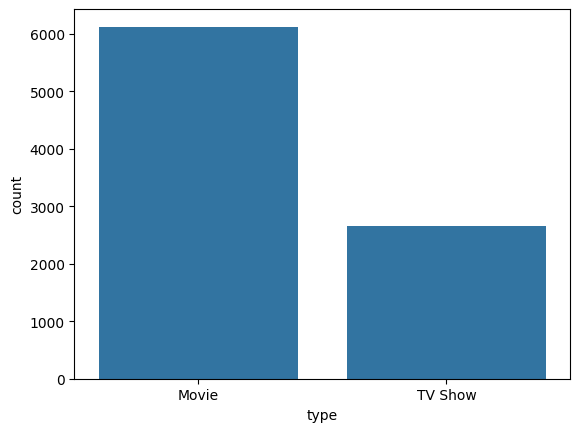

In [17]:
#Dsitribution of content based on type
sns.countplot(x=df['type'])

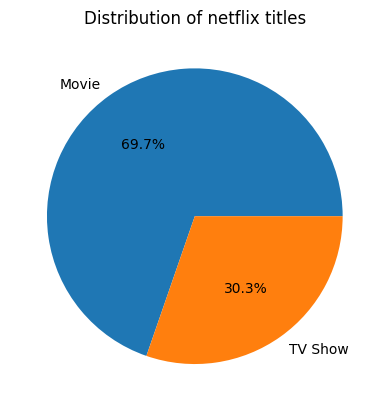

In [18]:
plt.title("Distribution of netflix titles")
p = plt.pie(df['type'].value_counts(), labels = df['type'].value_counts().index, autopct='%1.1f%%')
plt.show()

From the above graphs we can observe that, in terms of titles, movies are contributing to around 70% of records, whereas TV Shows are near to 30%. As TV Shows works on episode mecahnism compare to movies, therefore if we would observe the data based on watchtime, TV Shows would be in majority.

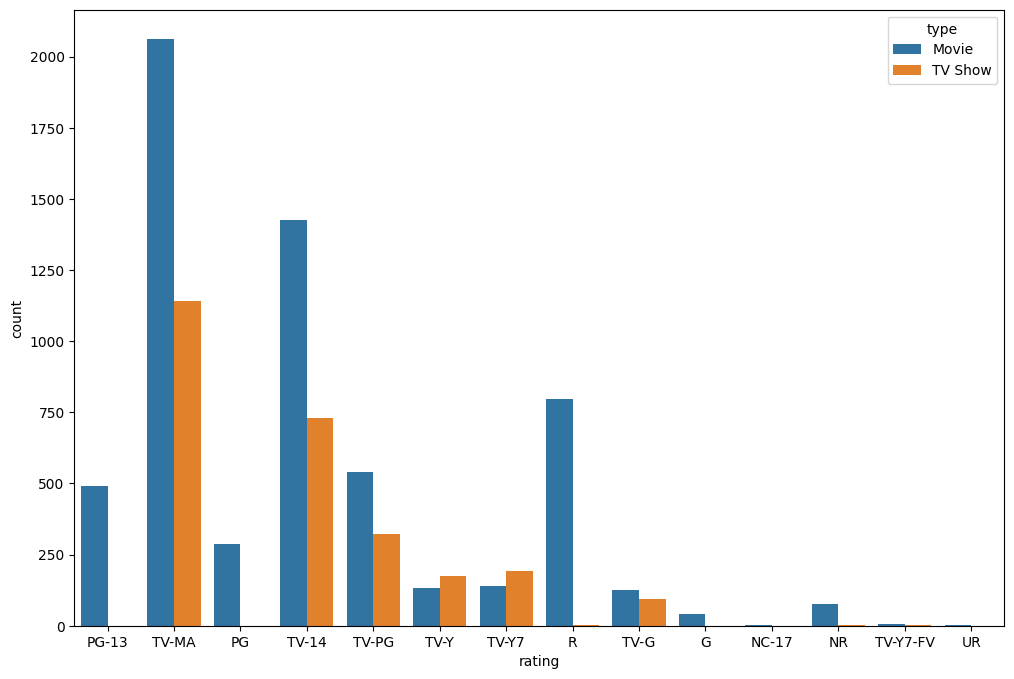

In [19]:
plt.figure(figsize = (12,8))
sns.countplot(x=df['rating'], hue=df['type'])
plt.show()

The ratings are based on the age groups of target audience.

We can observe that the content distribution in form of movies is much more available for adults whereas the TV Shows are targeting the younger ones majorly.

Visuaizing the content added over given period.

For that we will require to extract year and month form date added column.

In [20]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month

<Axes: >

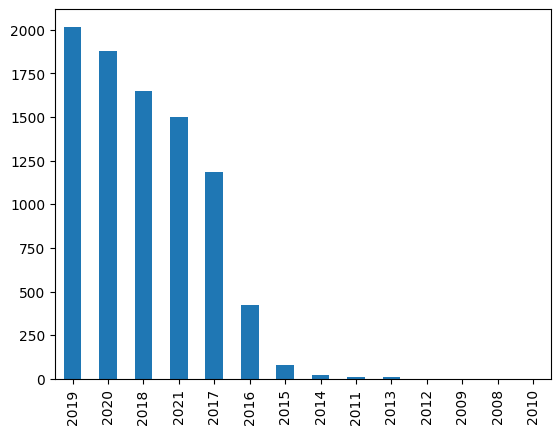

In [21]:
df['year_added'].value_counts().plot(kind='bar')

In [22]:
year1 = df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})

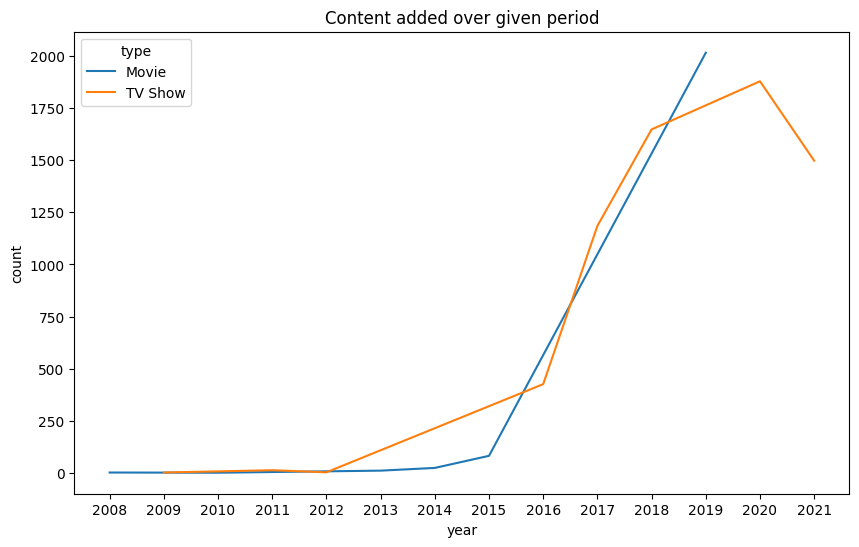

In [23]:
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=year1, x='year', y='count', hue=df['type'])
ax.set_xticks(np.arange(2008,2022,1))
plt.title("Content added over given period")
plt.show()

The graph shows the distribution of content that got added from 2008 to 2021, of type - movies and TV Shows

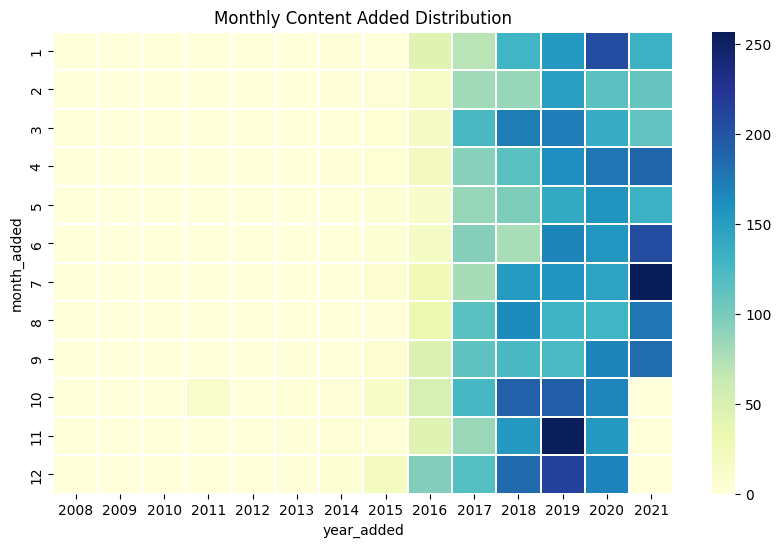

In [24]:
mon = df.groupby('year_added').month_added.value_counts().unstack().fillna(0).T

plt.figure(figsize=(10,6))
sns.heatmap(mon,linewidths=0.025, cmap="YlGnBu")
plt.title("Monthly Content Added Distribution")
plt.show()

The heatmap shows the distribution in terms of months.

Answering few analytical questions


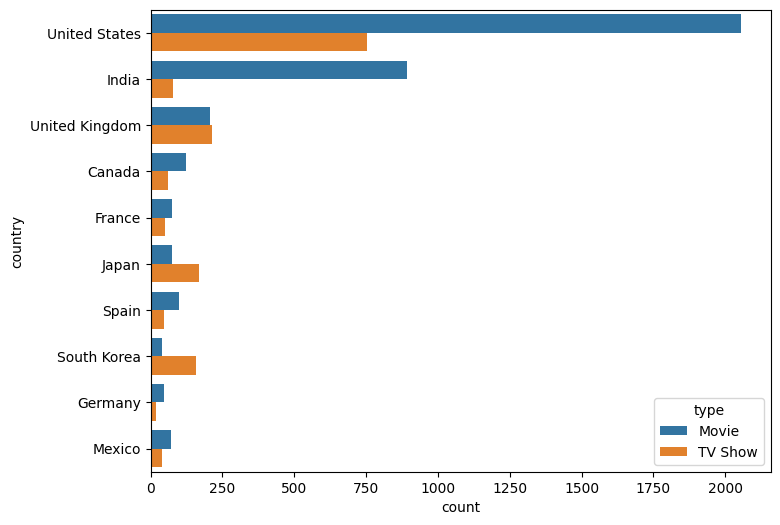

In [67]:
#Top 10 countries contributing to the content on netflix
countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries = countries[countries != "Unavailable"]

plt.figure(figsize=(8,6))
sns.countplot(y=df['country'], order = countries.value_counts().index[:10], hue=df['type'])
plt.show()

In [26]:
countries.value_counts().head(10)

United States     3680
India             1046
United Kingdom     803
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64

In [27]:
#5 Most Popular Genre
genre = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre.value_counts().head(5)

International Movies      2752
Dramas                    2426
Comedies                  1674
International TV Shows    1349
Documentaries              869
dtype: int64

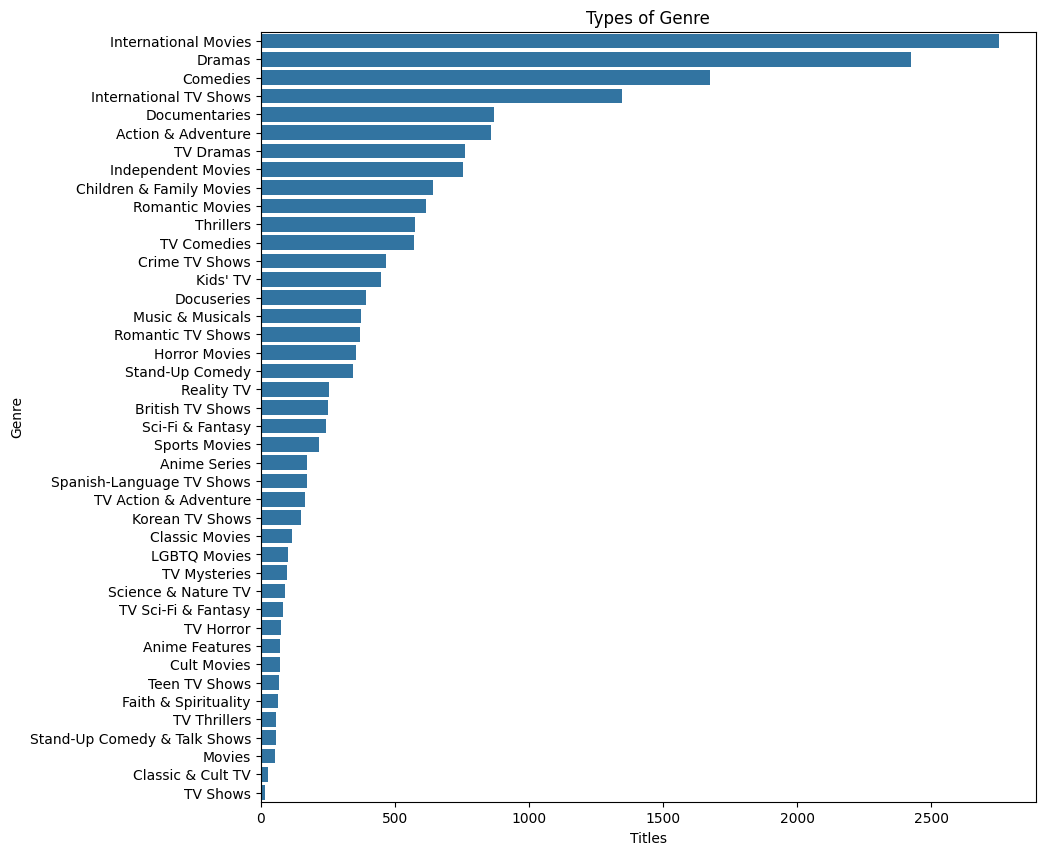

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(y=genre, order=genre.value_counts().index)
plt.title("Types of Genre")
plt.xlabel("Titles")
plt.ylabel("Genre")
plt.show()

Dividing the data into Movies and TV Shows

In [29]:
mov = df[df['type'] == "Movie"]
shows = df[df['type'] == "TV Show"]

In [30]:
mov.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [31]:
shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Specified,Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


<ipython-input-50-deeda4e22542>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=mov.rating, palette='Set1')
<ipython-input-50-deeda4e22542>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=shows.rating, palette='Set1')


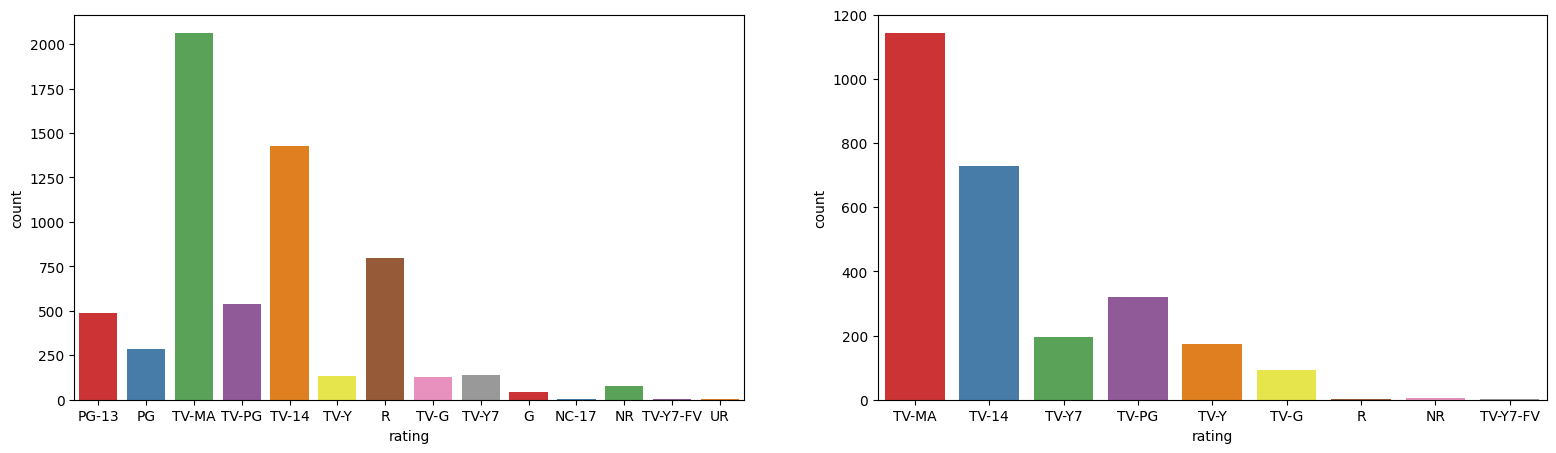

In [50]:
plt.figure(figsize=(19,5))
plt.subplot(1,2,1)
sns.countplot(x=mov.rating, palette='Set1')
plt.subplot(1,2,2)
sns.countplot(x=shows.rating, palette='Set1')
plt.show()

In [33]:
mov.duration = mov['duration'].str.replace(' min', '').astype(int)
mov.duration.describe()

<ipython-input-33-379ee71f0a5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov.duration = mov['duration'].str.replace(' min', '').astype(int)


count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

Shortest movie present is of 3min, longest having duration of 312min and the average length of movies is around 100min.

In [34]:
mov.sort_values('duration', ascending=False)[:1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4253,s4254,Movie,Black Mirror: Bandersnatch,Not Available,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,12


The longest movie present is "Black Mirror: Bandersnatch", which is 5hr 12min long

In [35]:
mov['date_added'] = pd.to_datetime(mov['date_added'])

<ipython-input-35-11618edb6470>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov['date_added'] = pd.to_datetime(mov['date_added'])


In [36]:
mov[mov['date_added']==mov.date_added.min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008,1


The movie which was added earliest is "To and From New York"